In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
import math

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
data = pd.read_csv('/content/gdrive/MyDrive/mllabpg/lab3/playTennis.csv')

In [6]:
data.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [7]:
data.tail()

,outlook,temp,humidity,windy,play
9,rainy,mild,normal,False,yes
10,sunny,mild,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes
13,rainy,mild,high,True,no


In [39]:
data.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [40]:
data.dtypes

outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object

In [12]:
def find_entropy(data):
    """
    Returns the entropy of the class or features
    formula: - ∑ P(X)logP(X)
    """
    entropy = 0
    for i in range(data.nunique()):
        x = data.value_counts()[i]/data.shape[0] 
        entropy += (- x * math.log(x,2))
    return round(entropy,3)



def information_gain(data, data_):
    """
    Returns the information gain of the features
    """
    info = 0
    for i in range(data_.nunique()):
        df = data[data_ == data_.unique()[i]]
        w_avg = df.shape[0]/data.shape[0]
        entropy = find_entropy(df.play)
        x = w_avg * entropy
        info += x
    ig = find_entropy(data.play) - info
    return round(ig, 3)   



def entropy_and_infogain(datax, feature):
    """
    Grouping features with the same class and computing their 
    entropy and information gain for splitting
    """
    for i in range(data[feature].nunique()):
        df = datax[datax[feature]==data[feature].unique()[i]]
        if df.shape[0] < 1:
            continue
        
        print(f'Entropy of {feature} - {data[feature].unique()[i]} = {find_entropy(df.play)}')
    print(f'Information Gain for {feature} = {information_gain(datax, datax[feature])}')

In [10]:
print(f'Entropy of the entire dataset: {find_entropy(data.play)}')

Entropy of the entire dataset: 0.94


In [13]:
entropy_and_infogain(data, 'outlook')

Entropy of outlook - sunny = 0.971
Entropy of outlook - overcast = 0.0
Entropy of outlook - rainy = 0.971
Information Gain for outlook = 0.246


In [14]:
entropy_and_infogain(data, 'temp')

Entropy of temp - hot = 1.0
Entropy of temp - mild = 0.918
Entropy of temp - cool = 0.811
Information Gain for temp = 0.029


In [15]:
entropy_and_infogain(data, 'humidity')

Entropy of humidity - high = 0.985
Entropy of humidity - normal = 0.592
Information Gain for humidity = 0.151


In [16]:
entropy_and_infogain(data, 'windy')

Entropy of windy - False = 0.811
Entropy of windy - True = 1.0
Information Gain for windy = 0.048


In [29]:
pd


<module 'pandas' from '/usr/local/lib/python3.9/dist-packages/pandas/__init__.py'>

In [17]:
sunny = data[data['outlook'] == 'sunny']

In [18]:
print(f'Entropy of the Sunny dataset: {find_entropy(sunny.play)}')

Entropy of the Sunny dataset: 0.971


In [19]:
entropy_and_infogain(sunny, 'temp')

Entropy of temp - hot = 0.0
Entropy of temp - mild = 1.0
Entropy of temp - cool = 0.0
Information Gain for temp = 0.571


In [20]:
entropy_and_infogain(sunny, 'humidity')

Entropy of humidity - high = 0.0
Entropy of humidity - normal = 0.0
Information Gain for humidity = 0.971


In [21]:
entropy_and_infogain(sunny, 'windy')

Entropy of windy - False = 0.918
Entropy of windy - True = 1.0
Information Gain for windy = 0.02


In [22]:
rainy = data[data['outlook'] == 'rainy']

In [23]:
print(f'Entropy of the Rainy dataset: {find_entropy(rainy.play)}')

Entropy of the Rainy dataset: 0.971


In [24]:
entropy_and_infogain(rainy, 'temp')

Entropy of temp - mild = 0.918
Entropy of temp - cool = 1.0
Information Gain for temp = 0.02


In [25]:
entropy_and_infogain(rainy, 'humidity')

Entropy of humidity - high = 1.0
Entropy of humidity - normal = 0.918
Information Gain for humidity = 0.02


In [26]:
entropy_and_infogain(rainy, 'windy')

Entropy of windy - False = 0.0
Entropy of windy - True = 0.0
Information Gain for windy = 0.971


In [30]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
PlayTennis = pd.read_csv("/content/gdrive/MyDrive/mllabpg/lab3/playTennis.csv")
PlayTennis.head()



,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [43]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

PlayTennis['outlook'] = Le.fit_transform(PlayTennis['outlook'])
PlayTennis['temp'] = Le.fit_transform(PlayTennis['temp'])
PlayTennis['humidity'] = Le.fit_transform(PlayTennis['humidity'])
PlayTennis['windy'] = Le.fit_transform(PlayTennis['windy'])
PlayTennis['play'] = Le.fit_transform(PlayTennis['play'])

In [44]:
y = PlayTennis['play']
X = PlayTennis.drop(['play'],axis=1)

In [46]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X, y)

[Text(0.4, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

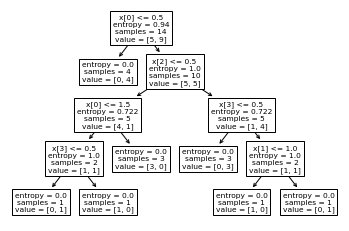

In [47]:
tree.plot_tree(clf)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


In [51]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


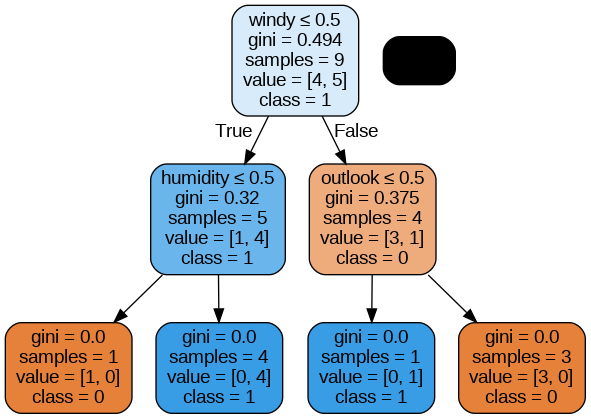

In [52]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [53]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4


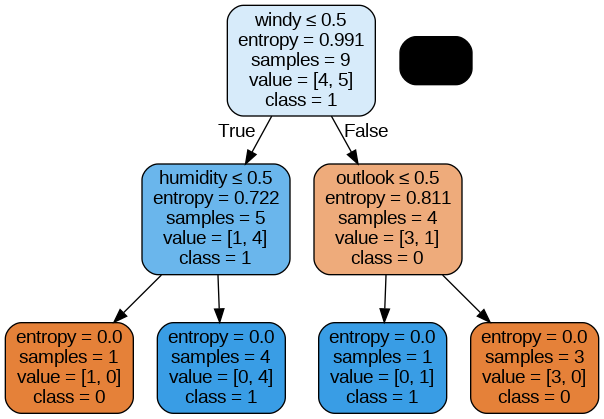

In [54]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())